## Data Cleaning

Pembersihan data dapat dilakukan dengan beberapa tahap, yaitu:

**1. Eksplorasi Awal Data:** Pertama-tama, kita perlu memahami struktur dan konten dari dataset yang diberikan. Dengan begitu, kita bisa menentukan langkah pembersihan yang perlu dilakukan.

**A. Handle Missing Values:**
Kita akan memeriksa apakah ada nilai yang hilang dalam dataset dan menentukan cara menanganinya.

**B. Handle Duplicated Data:**
Kita akan memeriksa data yang duplikat dan memutuskan apakah akan menghapusnya.

**C. Handle Outliers:**
Kita akan memeriksa apakah ada outlier dalam data numerik dan memutuskan bagaimana menanganinya.

**D. Feature Transformation:**
Berdasarkan distribusi data, kita mungkin perlu melakukan transformasi fitur untuk meningkatkan performa model.

**E. Feature Encoding:**
Kita akan memeriksa tipe data dari setiap kolom dan menentukan apakah ada yang perlu di-encode.

**F. Handle Class Imbalance:**
Kita akan memeriksa distribusi kelas target untuk melihat apakah ada ketidakseimbangan kelas yang perlu diatasi.

## Import Library

In [3]:
#Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Explorasi Data

In [5]:
data = pd.read_csv(r'D:\FILE_IRFAN_KARIM\Rakamin DS MSIB\Dataset/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Berdasarkan eksplorasi awal, dataset ini berisi beberapa fitur tentang pelanggan sebuah bank, dan kolom target "Exited" yang menunjukkan apakah pelanggan tersebut churn (bernilai 1) atau tidak (bernilai 0).

**Fitur-fitur yang tersedia di dataset ini meliputi:**
1. RowNumber: Nomor baris
2. CustomerId: ID pelanggan
3. Surname: Nama belakang pelanggan
4. CreditScore: Skor kredit pelanggan
5. Geography: Negara asal pelanggan
6. Gender: Jenis kelamin pelanggan
7. Age: Umur pelanggan
8. Tenure: Lamanya pelanggan menjadi nasabah bank
9. Balance: Saldo rekening pelanggan
10. NumOfProducts: Jumlah produk yang dimiliki pelanggan di bank
11. HasCrCard: Apakah pelanggan memiliki kartu kredit (1 = Ya, 0 = Tidak)
12. IsActiveMember: Apakah pelanggan aktif (1 = Ya, 0 = Tidak)
13. EstimatedSalary: Gaji estimasi pelanggan
14. Exited: Apakah pelanggan churn (1 = Ya, 0 = Tidak)

Tetapi dikarenakan ada 3 fitur yang tidak terlalu mendukung untuk pemodelan. Maka dari itu kami akan menghapus 3 kolom tersebut

In [6]:
#Buang kolom yang tidak diperlukan 
data.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

Dengan memahami fitur-fitur di atas, kita dapat melanjutkan ke langkah selanjutnya yaitu **Handle Missing Values**.

#### **A. Handle Missing Values**

Untuk melihat nilai missing value berdasarkan kolom bisa menggunakan kode dibawah:

In [7]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Hasil diatas menjawab pertanyaan bahwa tidak ada nilai yang hilang di setiap kolom. Oleh karena itu, tidak perlu mengambil tindakan apa pun terkait dengan nilai yang hilang.**

#### **B. Handle Duplicated Data**

 Kita akan memeriksa apakah ada data yang duplikat dalam dataset ini.

In [8]:
# Check for duplicated rows in the dataset
duplicated_rows = data.duplicated().sum()
duplicated_rows

0

**Penjelasan dari Handle Duplicated Data:**
Tidak ada baris yang duplikat dalam dataset ini. Oleh karena itu, kita tidak perlu mengambil tindakan apa pun terkait dengan data duplikat.

#### **C. Handle Outliers**
kita akan melakukan pengecekan outlier dengan bantuan boxplot agar lebih mudah terlihat outlier nya.

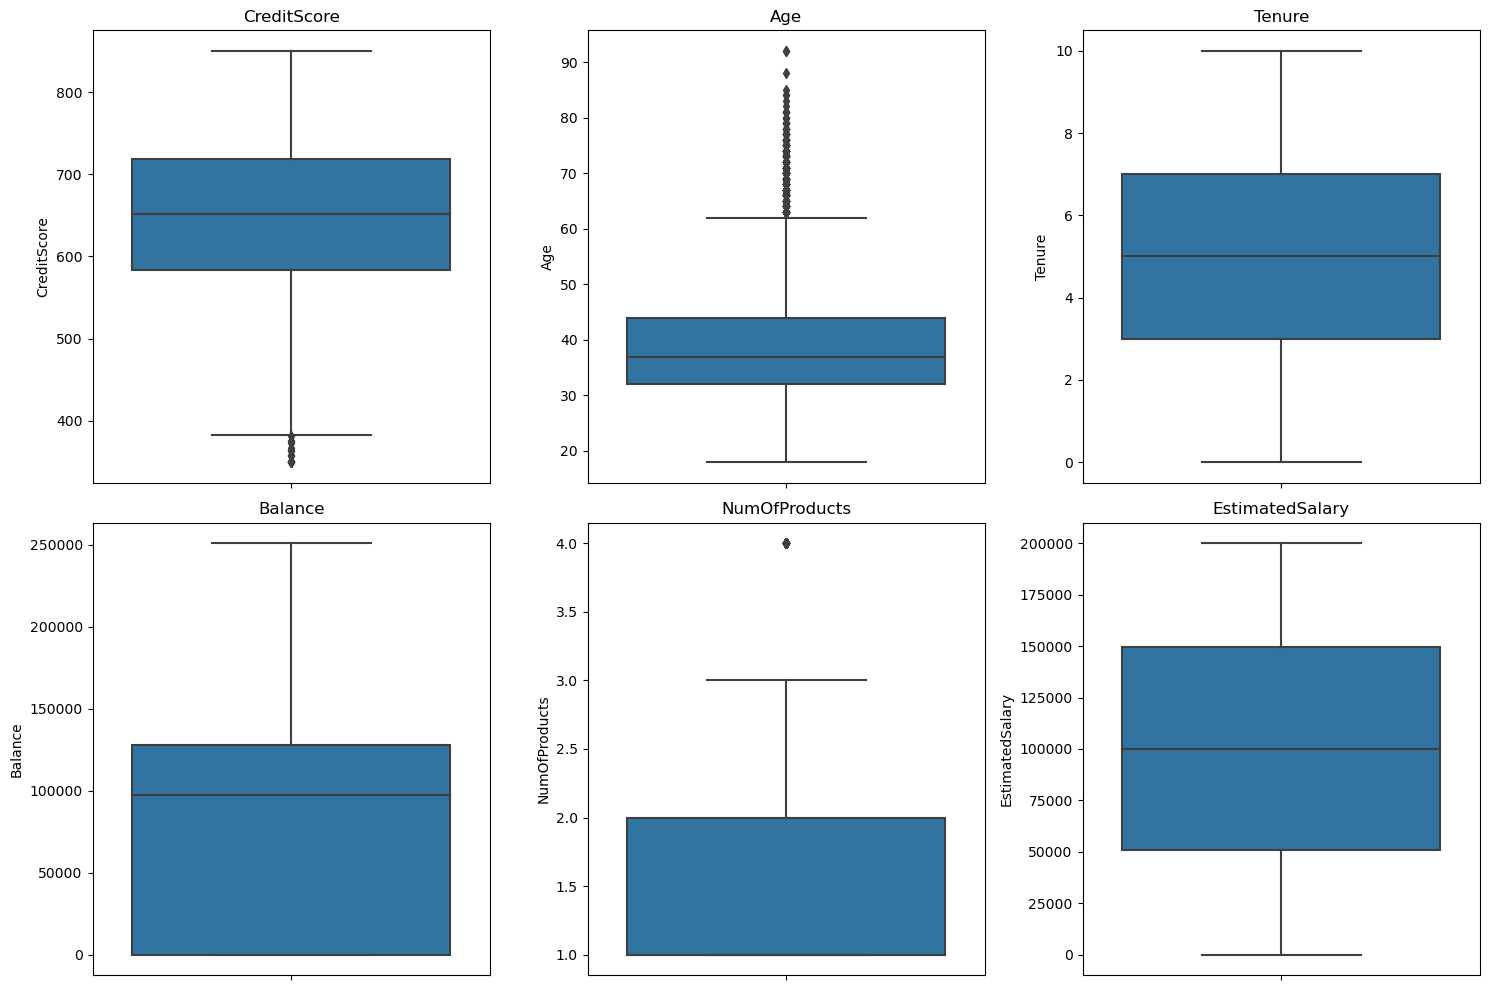

In [9]:
# List of numeric features to check for outliers
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Plot boxplots for each numeric feature to visualize outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[feature])
    plt.title(feature)
    plt.tight_layout()

plt.show()

**Dari boxplot di atas, kita dapat mengamati beberapa hal:**
1. **CreditScore:** Terdapat beberapa nilai yang lebih rendah daripada whisker bawah, yang dapat dianggap sebagai outlier.
2. **Age:** Terdapat beberapa nilai yang lebih tinggi daripada whisker atas, yang dapat dianggap sebagai outlier.
3. **Tenure:** Tidak tampak adanya outlier.
4. **Balance:** Tidak tampak adanya outlier.
5. **NumOfProducts:** Terdapat beberapa nilai yang lebih tinggi daripada whisker atas, yang dapat dianggap sebagai outlier.
6. **EstimatedSalary:** Tidak tampak adanya outlier.

Meskipun kita dapat mengidentifikasi beberapa outlier, keputusan untuk menanganinya tergantung pada konteks bisnis dan tujuan analisis. Dalam banyak kasus, outlier mungkin mengandung informasi yang penting. 

Sebagai contoh, dalam analisis churn, pelanggan dengan perilaku yang "tidak biasa" (mis. skor kredit yang sangat rendah atau usia yang sangat tinggi) mungkin justru adalah segmen yang penting untuk dipahami. Tetapi, outlier bisa saja mengakibatkan model yang akan dibuat menghasilkan hasil yang kurang memuaskan.

Untuk saat ini, kami akan mengatasi outlier tersebut dengan memakai metode interquantile range (IQR) untuk mengurangi outlier yang ada.

In [10]:
#Handle Outlier pada kolom CreditScore
Q1 = data['CreditScore'].quantile(0.25)
Q3 = data['CreditScore'].quantile(0.75)

IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((data['CreditScore'] >= low_limit) & (data['CreditScore'] <= high_limit)) 
data = data[filtered_entries]

In [11]:
#Handle Outlier pada kolom Age
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)

IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((data['Age'] >= low_limit) & (data['Age'] <= high_limit)) 
data = data[filtered_entries]

In [12]:
#Handle Outlier pada kolom NumOfProducts
Q1 = data['NumOfProducts'].quantile(0.25)
Q3 = data['NumOfProducts'].quantile(0.75)

IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((data['NumOfProducts'] >= low_limit) & (data['NumOfProducts'] <= high_limit)) 
data = data[filtered_entries]

#### Cek hasil handling outlier
untuk mengecek hasil dari handling outlier kami menggunakan boxplot kembali untuk melihat apakah outlier nya sudah berkurang atau belum

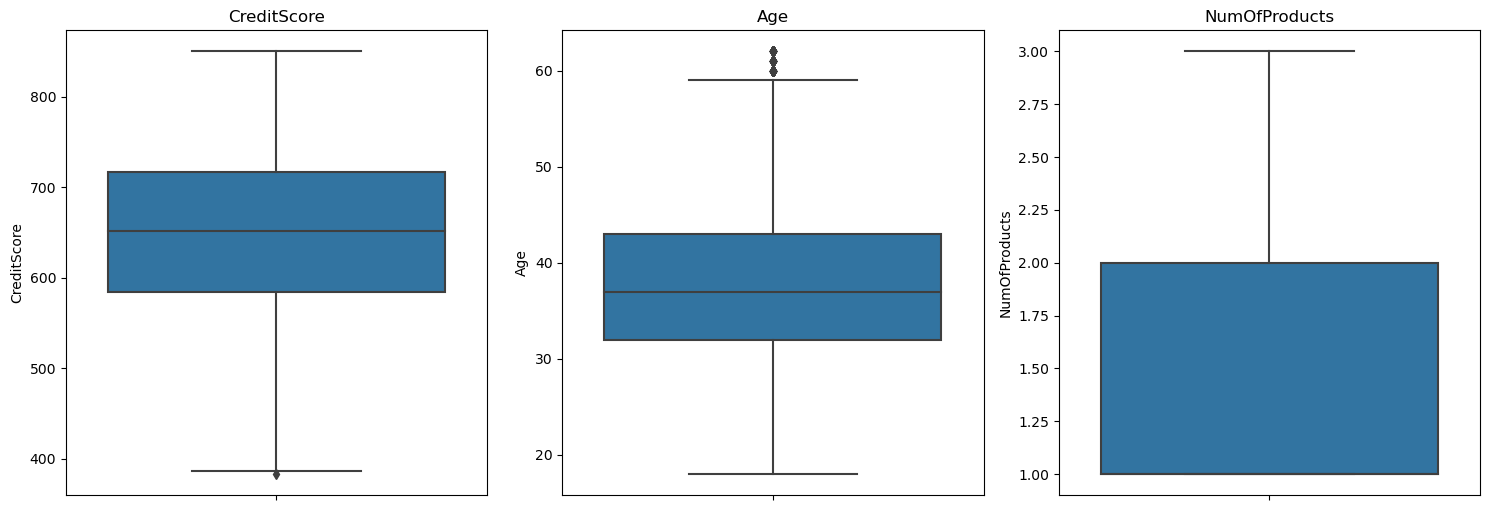

In [13]:
#Cek hasil handling outlier pada kolom yang teridentifikasi memiliki outlier
numeric_features = ['CreditScore', 'Age', 'NumOfProducts']

# Plot boxplots for each numeric feature to visualize outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[feature])
    plt.title(feature)
    plt.tight_layout()

plt.show()

#### **D. Feature Transformation**

Transformasi fitur dapat meningkatkan performa model dengan mengubah distribusi atau skala data. Beberapa metode transformasi populer meliputi normalisasi, standarisasi, dan transformasi logaritmik.
Pertama, kita lihat distribusi dari fitur numerik untuk memutuskan apakah transformasi diperlukan.

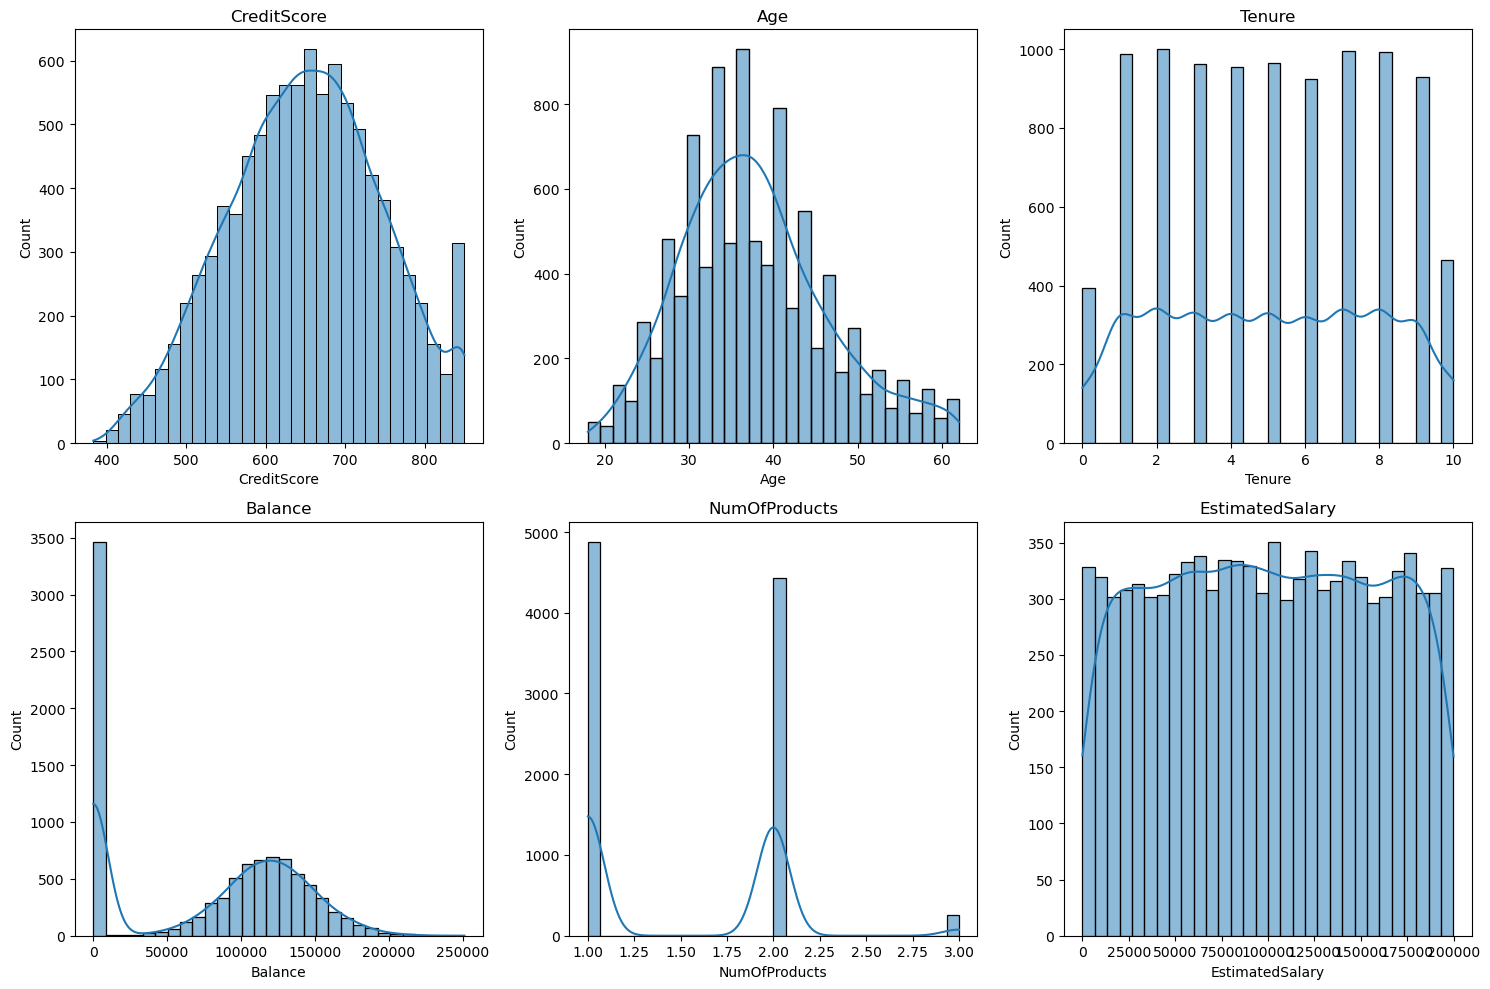

In [14]:
# Plot histograms for each numeric feature to visualize their distribution
numeric_features_2 = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features_2, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(feature)
    plt.tight_layout()
#plt.savefig('D:\FILE_IRFAN_KARIM\Rakamin DS MSIB\Tugas\Homework Week 11\Homework\PLOT/hist.png')
plt.show()

#### Melakukan Normalisasi data

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Balance','CreditScore', 'EstimatedSalary']] = scaler.fit_transform(data[['Balance','CreditScore', 'EstimatedSalary']])

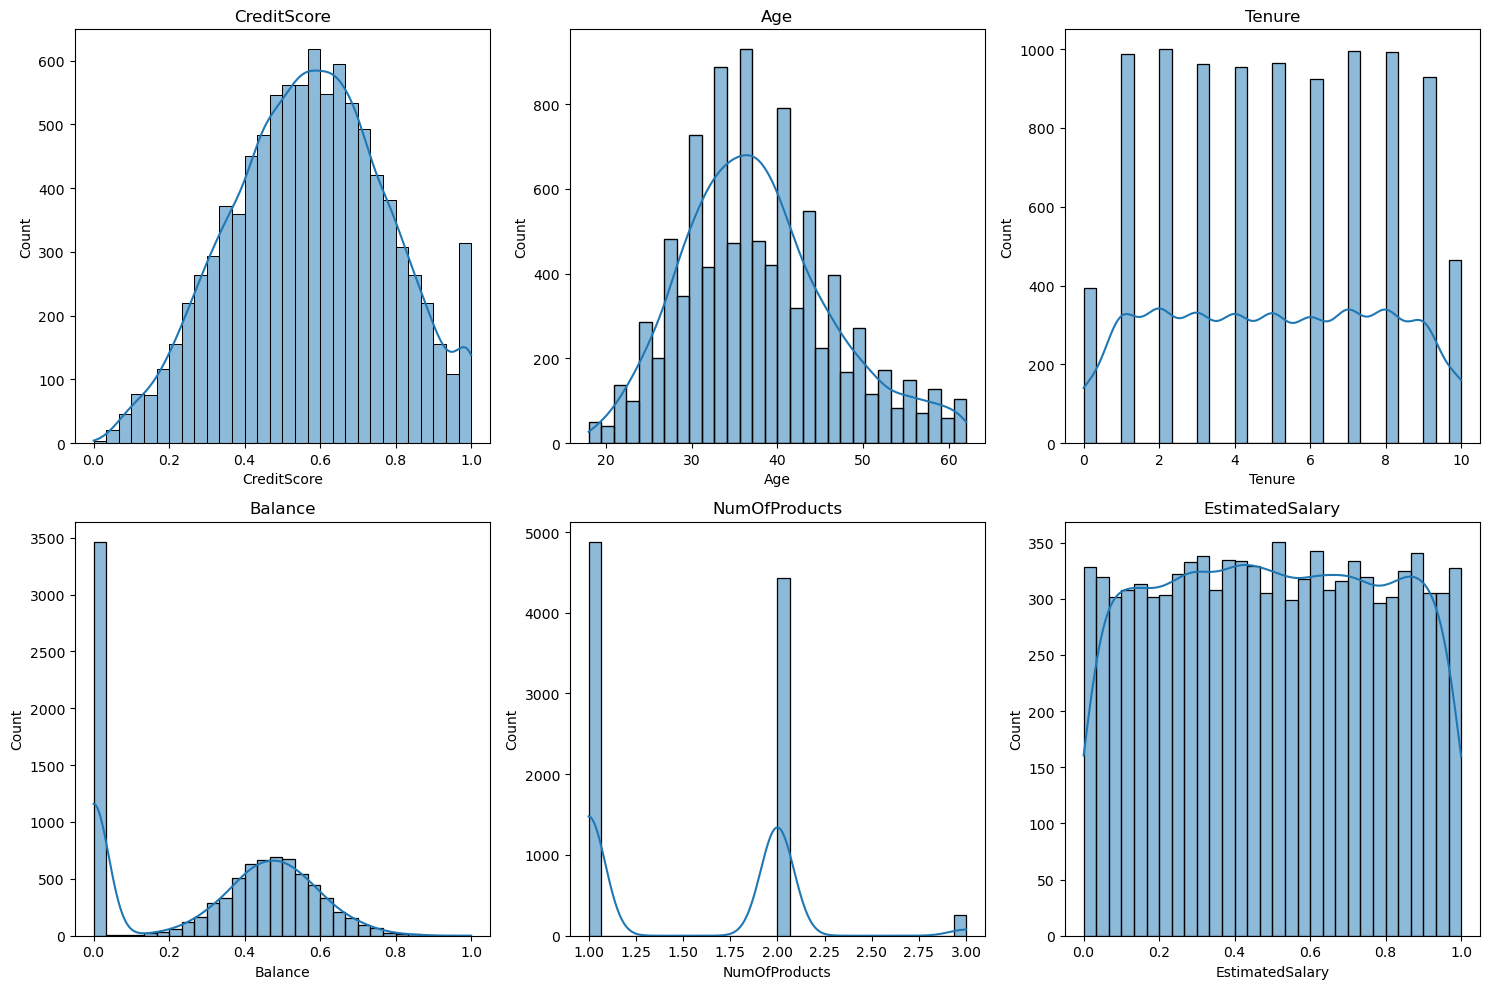

In [16]:
#Plot Setelah di Normalisasi
numeric_features_2 = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features_2, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(feature)
    plt.tight_layout()
#plt.savefig(r'D:\FILE_IRFAN_KARIM\Rakamin DS MSIB\Tugas\Homework Week 11\Homework\PLOT/hist_after_normalisasi.png')
plt.show()

**Berdasarkan histogram di atas:**
1. CreditScore: Distribusi tampaknya mendekati normal.
2. Age: Distribusi sedikit condong ke kanan.
3. Tenure: Distribusi tampak multi-modal, dengan beberapa puncak.
4. Balance: Terdapat dua puncak, salah satunya di nol yang menunjukkan banyak pelanggan dengan saldo nol.
5. NumOfProducts: Distribusi adalah kategorikal dengan beberapa nilai yang dominan.
6. EstimatedSalary: Distribusi tampaknya seragam.

Pada Feature-Feature yang memiliki rentang yang jauh kami melakukan transformasi feature menggunakan minmaxscaler untuk mengubah rentang datanya menjadi 0-1 tujuan nya agar model yang nantinya kami buat dapat menghasilkan nilai yang optimal.


#### **E. Feature Encoding**

Encoding adalah proses konversi fitur kategorikal menjadi format yang dapat dimengerti oleh algoritma machine learning. Kita akan memeriksa tipe data dari setiap kolom dan menentukan apakah ada fitur kategorikal yang perlu di-encode.

In [17]:
# Check the data types of each column
data_types = data.dtypes
data_types

CreditScore        float64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

**Berdasarkan tipe data, kita memiliki beberapa fitur kategorikal:**
1. Geography
2. Gender
3. Exited

Untuk fitur Geography, Exited dan Gender, kita perlu melakukan encoding. Ada berbagai metode encoding seperti One-Hot Encoding, Label Encoding, dan lainnya. Untuk tujuan ini, kita akan menggunakan Label Encoding.

In [18]:
v = data.head()
x = data['Geography'].value_counts()
y = data['Gender'].value_counts()
z = data['Exited'].value_counts()
display(v)
print(x)
print(y)
print(z)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.505353,France,Female,42,2,0.000000,1,1,1,0.506735,1
1,0.481799,Spain,Female,41,1,0.334031,1,0,1,0.562709,0
2,0.254818,France,Female,42,8,0.636357,3,1,0,0.569654,1
3,0.676660,France,Female,39,1,0.000000,2,0,0,0.469120,0
4,1.000000,Spain,Female,43,2,0.500246,1,1,1,0.395400,0


France     4798
Germany    2398
Spain      2372
Name: Geography, dtype: int64
Male      5236
Female    4332
Name: Gender, dtype: int64
0    7677
1    1891
Name: Exited, dtype: int64


In [22]:
## Menggunakan Label Encoder
from sklearn.preprocessing import LabelEncoder
# Buat objek LabelEncoder
label_encoder = LabelEncoder()

# Lakukan label encoding pada kolom "Geography" dan "Gender"
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Exited'] = label_encoder.fit_transform(data['Exited'])

# Hasil label encoding
display(data[['Geography','Gender', 'Exited']])

,Geography,Gender,Exited
0,0,0,1
1,2,0,0
2,0,0,1
3,0,0,0
4,2,0,0
...,...,...,...
9995,0,1,0
9996,0,1,0
9997,0,0,1
9998,1,1,1


In [30]:
#Hasil dari label encoding
x = data['Geography'].value_counts()
y = data['Gender'].value_counts()
z =  data['Exited'].value_counts()
print('Hasil encoding kolom geography:\n',x)
print('Hasil encoding kolom gender:\n',y)
print('Hasil encoding kolom exited:\n',z)

Hasil encoding kolom geography:
 0    4798
1    2398
2    2372
Name: Geography, dtype: int64
Hasil encoding kolom gender:
 1    5236
0    4332
Name: Gender, dtype: int64
Hasil encoding kolom exited:
 0    7677
1    1891
Name: Exited, dtype: int64


#### Dapat dilihat bahwa kami mendapatkan hasil 
**1.Pada kolom geography:
0 = Germany,
1 = France,
2 = Spain<br>
2.Pada kolom Gender:
0 = Female,
1 = Male<br>
3.Pada kolom exited :
0 = No
1 = Yes**

#### F. Handle Imbalance
sebelum melakukan imbalancing terhadap data, ada baiknya kita melihat terlebih dahulu berapa persen kelas mayoritas dan minoritas pada label target yang akan kita imbalance.

In [103]:
# Check the distribution of the target class 'Exited'
class_distribution = data['Exited'].value_counts(normalize=True)
class_distribution

0    0.802362
1    0.197638
Name: Exited, dtype: float64

**Distribusi kelas target (Exited) adalah sebagai berikut:**
1. Kelas 0 (Tidak Churn): 80.23%
2. Kelas 1 (Churn): 19.76%

Terdapat ketidakseimbangan kelas di mana kelas 0 memiliki representasi yang jauh lebih tinggi dibandingkan dengan kelas 1. Ketidakseimbangan ini dapat mempengaruhi performa model, terutama dalam menilai kelas minoritas.

**Ada beberapa metode untuk menangani ketidakseimbangan kelas, seperti:**
1. **Resampling:** Teknik ini melibatkan penambahan atau pengurangan sampel dari kelas tertentu untuk mencapai distribusi yang lebih seimbang.
2. **Menggunakan metrik evaluasi yang tepat:** Akurasi mungkin bukan metrik yang ideal dalam kasus ketidakseimbangan kelas. Metrik lain seperti F1-score, AUC-ROC, atau precision dan recall mungkin lebih informatif.
3. **Penggunaan algoritma yang mendukung penimbangan kelas:** Beberapa algoritma memungkinkan penimbangan kelas saat pelatihan, yang memberikan penalti lebih tinggi untuk kesalahan pada kelas minoritas.
4. **Penggunaan teknik ensemble seperti Random OverSampling Boost (ROSB) atau Synthetic Minority Over-sampling Technique (SMOTE).**

Keputusan tentang bagaimana menangani ketidakseimbangan kelas tergantung pada tujuan analisis dan model yang akan digunakan. Jika kita ingin fokus pada identifikasi pelanggan yang mungkin churn (kelas 1), maka mungkin perlu mempertimbangkan resampling atau teknik lain untuk meningkatkan sensitivitas model terhadap kelas tersebut.

Ketidakseimbangan kelas akan di-handle dengan menggunakan algoritma yang mendukung penimbangan kelas dan metrik evaluasi yang tepat. Imbalancing dilakukan dengan menetapkan threshold 0.5 untuk memperbanyak label yes.

#### Imbalancing terhadap data target dengan menetapkan threshold 50%

In [31]:
data['Exited'] = data['Exited'] > 0.8
print(data['Exited'].value_counts())

False    7677
True     1891
Name: Exited, dtype: int64


In [32]:
X = data[[col for col in data.columns if col not in['Exited']]].values
y = data['Exited'].values
print(X.shape)
print(y.shape)

(9568, 10)
(9568,)


In [ ]:
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(sampling_strategy=0.5).fit_resample(X,y)

In [107]:
print(pd.Series(y_over_SMOTE).value_counts())

False    7677
True     3838
dtype: int64


In [95]:
# Buat DataFrame baru untuk hasil oversampling
oversampled_data = pd.DataFrame(X_over_SMOTE, columns=data.drop('Exited',axis=1).columns)  # Gunakan kolom yang sesuai dengan DataFrame awal
oversampled_data['Exited'] = y_over_SMOTE  # Tambahkan kolom 'Exited' yang telah dihasilkan oleh SMOTE

# Sekarang, "oversampled_data" berisi data oversampling yang sesuai dengan DataFrame asli dengan kolom "Exited" yang sudah di-oversample

# Cetak beberapa baris pertama sebagai contoh
display(oversampled_data.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.505353,0.0,0.0,42.0,2.0,0.000000,1.0,1.0,1.0,0.506735,True
1,0.481799,2.0,0.0,41.0,1.0,0.334031,1.0,0.0,1.0,0.562709,False
2,0.254818,0.0,0.0,42.0,8.0,0.636357,3.0,1.0,0.0,0.569654,True
3,0.676660,0.0,0.0,39.0,1.0,0.000000,2.0,0.0,0.0,0.469120,False
4,1.000000,2.0,0.0,43.0,2.0,0.500246,1.0,1.0,1.0,0.395400,False


In [108]:
oversampled_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.505353,0.000000,0.0,42.000000,2.000000,0.000000,1.000000,1.0,1.000000,0.506735,True
1,0.481799,2.000000,0.0,41.000000,1.000000,0.334031,1.000000,0.0,1.000000,0.562709,False
2,0.254818,0.000000,0.0,42.000000,8.000000,0.636357,3.000000,1.0,0.000000,0.569654,True
3,0.676660,0.000000,0.0,39.000000,1.000000,0.000000,2.000000,0.0,0.000000,0.469120,False
4,1.000000,2.000000,0.0,43.000000,2.000000,0.500246,1.000000,1.0,1.000000,0.395400,False
...,...,...,...,...,...,...,...,...,...,...,...
11510,0.634086,2.000000,1.0,44.359295,4.000000,0.000000,1.359295,0.0,0.000000,0.338113,True
11511,0.599842,1.000000,0.0,41.403697,8.596303,0.644945,3.000000,1.0,1.000000,0.947536,True
11512,0.241600,0.780681,0.0,56.000000,2.219319,0.449553,3.000000,1.0,0.000000,0.776042,True
11513,0.407735,0.990327,1.0,51.009673,8.000000,0.388896,3.000000,1.0,1.000000,0.957338,True


In [97]:
oversampled_data.to_csv('Churn_Fix.csv', index=False)